# Clustering
Identifying similar instances and putting them into clusters is called _clustering_

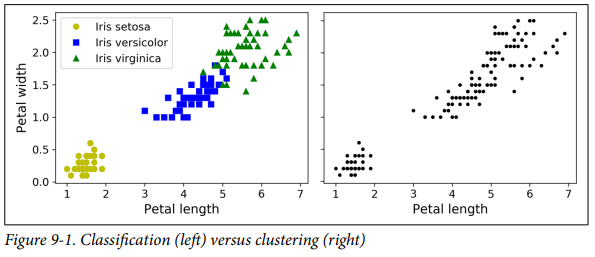

↑ This is how clustering works, its not perfect here, but good enough considering we didnt use other parameters (sepal length and sepal width)

### Application of clustering : 
- _Anomaly detection_ 
- _Image segmentation_
- _Recommender systems_
- _Dimensionality reduction_
- _Search Engine_
- _Data analysis_
- _Semi supervised learning_

___What is a cluster?___   
Cluster do not have any fixed definition, it varies according to problem. A cluster can be instances located around a single fixed point called centeroid Or a cluster can be region of densely packed instances Or there can be a cluster of clusters 

## K-Means clustering
It tries to find the center of blobs and assign each instance to its closest blob

In [ ]:
# Creating dataset 
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

# It returns, X=data instances, y=instances lables (0,1,2,3,4)(here lables means which cluster the instance belongs to)

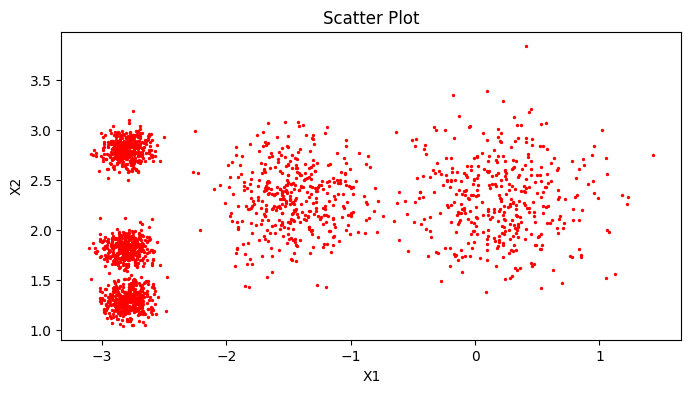

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0],X[:,1],c='r',s=2)
plt.title("Scatter Plot")
plt.show()

In [27]:
from sklearn.cluster import KMeans

k = 5 #5 clusters
kmeans = KMeans(n_clusters=k,random_state=42)

y_pred = kmeans.fit_predict(X,y)

y_pred is _label_ here, Label here is the index of cluster an instance is assigned

In [28]:
y_pred

array([3, 2, 0, ..., 2, 3, 1], shape=(2000,), dtype=int32)

In [29]:
# Check centroid of each cluster
kmeans.cluster_centers_

array([[-1.45140748,  2.31958553],
       [-2.79808761,  1.55306179],
       [ 0.38884446,  2.08066744],
       [-2.79846237,  2.80004584],
       [-0.01709342,  2.56932675]])

In [ ]:
# Predict new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

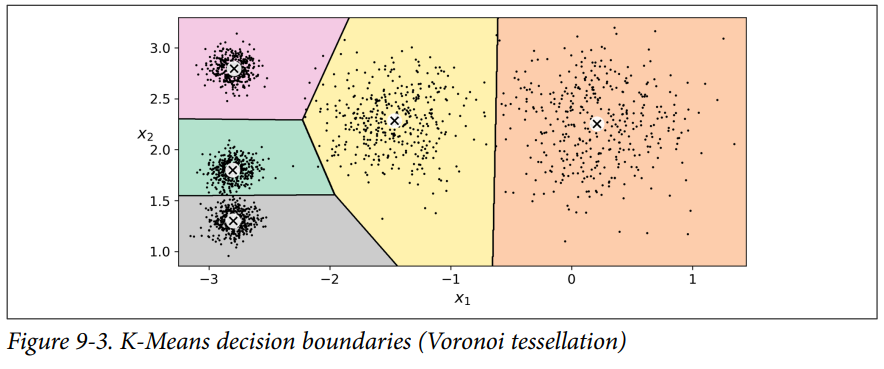

_Note -_  
Instead of assigning each instance a single label directly called _"Hard Clustering"_  
We can assign score to each instance called _"Soft Clustering"_, the score can be distance of instance to each centroid or similarity score (or affinity) given by functions such as gaussian radial basis function

In [32]:
# Assigning distance as score to each instance

kmeans.transform(X_new)
# .transform function measures distance of each instance to all centroids

array([[1.48617583, 2.83355749, 0.39712372, 2.91057812, 0.5695833 ],
       [4.46286494, 5.81528793, 2.61240128, 5.85339553, 3.07033967],
       [1.69147942, 1.46095817, 3.51133011, 0.28389977, 3.01383661],
       [1.55906644, 0.96822548, 3.41468982, 0.36144837, 2.98371209]])

#### ___kmeans.transform()___ _as dimensionality reduction_  
Suppose original dataset has shape (n,d) and there are "k" clusters in that data then we can reduce the dimension "d" to "k" through this transform,   
Now each features represents distance between instance and centroid instead of original feature value

### How the algorithm works 
- Pick k random points from dataset (k=number of clusters), These are initial centroids
- Assign every instance to these centroids - This will form clusters based on current centroids

- Now compute distance of each instance to its respective centroid in the cluster and take mean of all those distances   
- Now move the centroid to that mean  

Example: suppose we have instance in a cluster as (1,2),(2,3),(3,2)  
Mean along x-axis:  
$\bar{x} = \frac{1 + 2 + 3}{3} = 2$     
Mean along y-axis:   
$\bar{y} = \frac{2 + 3 + 2}{3} = 2.33$   
New centroid coordinates:    
$\mu_1 = (\bar{x}, \bar{y}) = (2, 2.33)$  

- Repeat this until centroid stops moving. This algorithm is guaranteed to converge

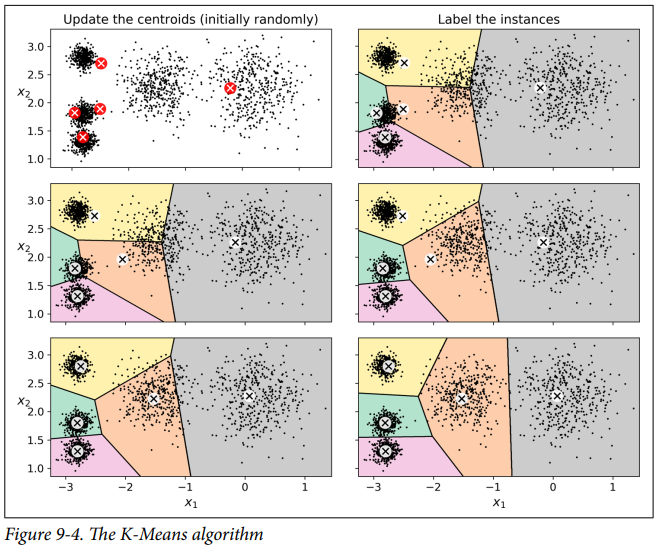

Now the thing is that  
This algorithm will definitely converge, but to optimal solution? may not!!   
Wheather this converges to local optimum or global optimum depends on centroid initialization!   
But wasnt that random? Yes, but there are few things we can do though

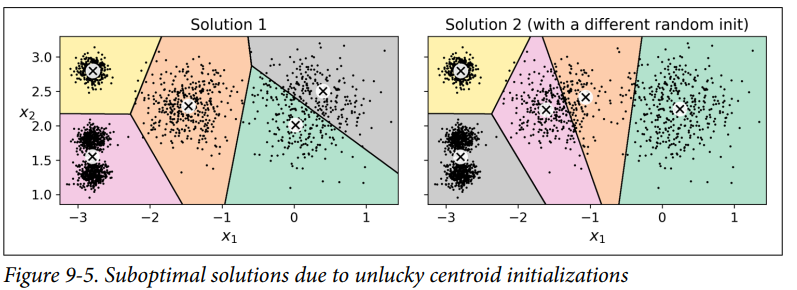

### Centroid Initialization methods

1. If you happen to know where centroids should be, we can give that to model as numpy array and keep n_init=1
``` python
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```

2. Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that
the whole algorithm described earlier runs 10 times when you call fit(), and ScikitLearn keeps the best solution.  
How to decide which is better solution? _Performance metric_ called ___inertia___

In [34]:
kmeans.inertia_
#Only the best inertia is returned

226.45443592480848

In [38]:
kmeans.score(X)
# Its value is negative so it can follow that "Bigger is better rule" of sklearn

-226.45443592480848